In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
print("all required things are installed")

all required things are installed


In [24]:
import pandas as pd

df = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

df = df.copy()

df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

#one hot enchoded one parameter
df = pd.get_dummies(df, columns= ["ocean_proximity"] , drop_first= True )

print("done here")

d


In [32]:

X = df.drop("median_house_value" , axis= 1)  #spliting features
y = df["median_house_value"]                 #target

#this is not the spliting the datasets


In [47]:
#now we will spliting the dataset into two halves
#split A: 80-20
#split B : 40-60

X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(
    X, y, train_size= 0.8, random_state= 42
)

X_train_B , X_test_B, y_train_B, y_test_B = train_test_split(
    X, y, train_size= 0.4, random_state= 42
)

print("Both data spliting is done!")


Both data spliting is done!


In [43]:
#model fitting wtih both of the data

model_A = LinearRegression()
model_A.fit(X_train_A, y_train_A)

model_B = LinearRegression()
model_B.fit(X_train_B, y_train_B)

print("model trained")

model trained


In [44]:
#predictions of the models

y_pred_A = model_A.predict(X_test_A)
y_pred_B = model_B.predict(X_test_B)



In [51]:
#EVALUATION OF THE ERRORS

from sklearn.metrics import r2_score

mse_A = mean_squared_error(y_test_A, y_pred_A)
r2_A = r2_score(y_test_A, y_pred_A)

mse_B = mean_squared_error(y_test_B, y_pred_B)
r2_B = r2_score(y_test_B, y_pred_B)


In [50]:
print("MODEL A MSE")
print(mse_A)
print("model B  mse")
print(mse_B)

MODEL A MSE
4908476721.156596
model B  mse
4775290665.72522


In [53]:
#printing the r2 scores

print("r2 score of model A ", r2_A )
print("r2 score of model B: " , r2_B)

r2 score of model A  0.6254240620553622
r2 score of model B:  0.6399296192385496


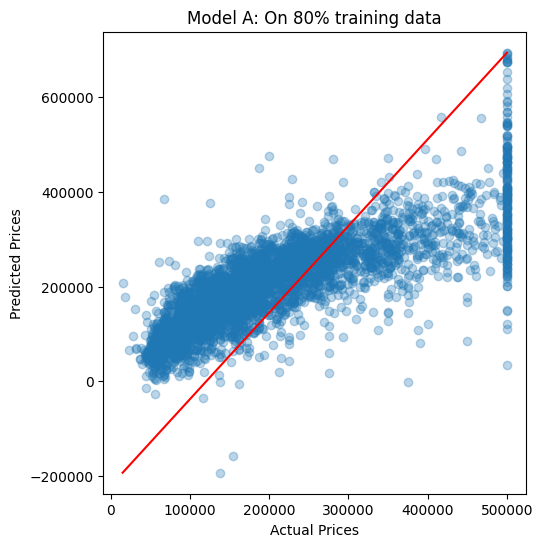

In [55]:
#PLOTING THE 1ST MODEL
plt.figure(figsize= (12, 6))

plt.subplot(1,2,1)
plt.scatter(y_test_A, y_pred_A, alpha=0.3)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Model A: On 80% training data")
plt.plot([y_test_A.min(), y_test_A.max()],
        [y_pred_A.min(), y_pred_A.max()],
        color="red")
plt.show()

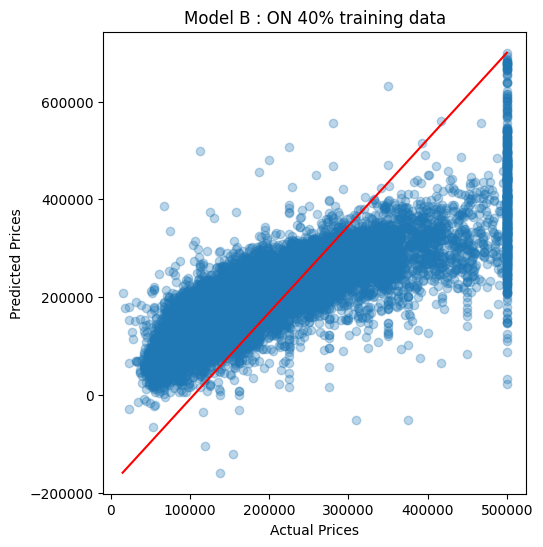

In [58]:
#plotting the second model

plt.figure(figsize=(12,6))

plt.subplot(1,2,2)
plt.scatter(y_test_B, y_pred_B, alpha= 0.3)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Model B : ON 40% training data")
plt.plot([y_test_B.min(), y_test_B.max()],
        [y_pred_B.min(), y_pred_B.max()],
        color="red")
plt.show()

In [62]:
#plotting the learning curves
train_sizes = np.linspace(0.1, 0.9, 9)

train_errors = []
val_errors = []

for size in train_sizes:
    X_train_lc, X_val_lc, y_train_lc, y_val_lc = train_test_split(
        X, y, train_size=size,  random_state= 42
    )
    model = LinearRegression()
    model.fit(X_train_lc, y_train_lc)
    y_pred_lc = model.predict(X_train_lc)
    
    y_val_pred = model.predict(X_val_lc)
    
    train_mse = mean_squared_error(y_train_lc, y_pred_lc)
    
    val_mse = mean_squared_error(y_val_lc, y_val_pred)
    
    train_errors.append(train_mse)
    
    val_errors.append(val_mse)
    





    


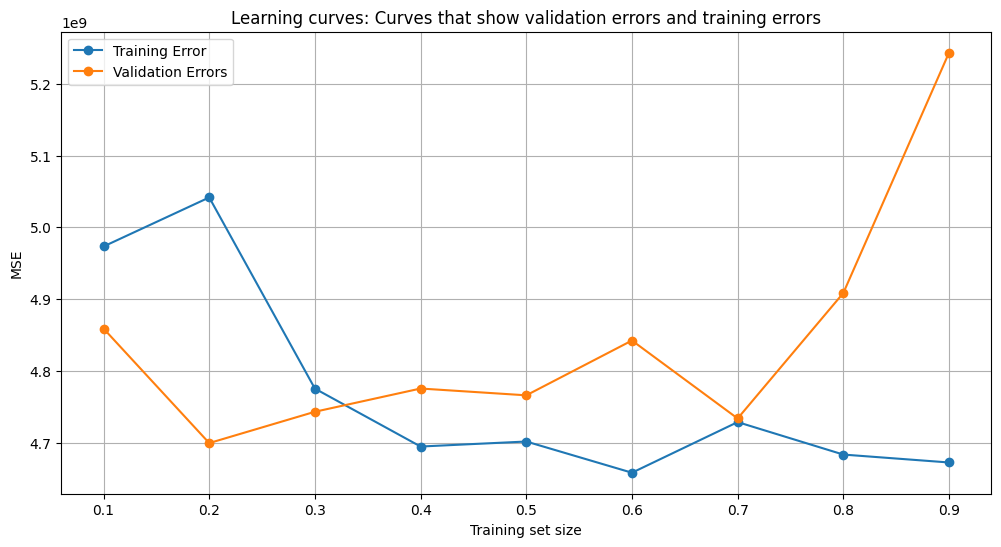

In [64]:
#plotting the learning curves
plt.figure(figsize = (12,6))

plt.plot(train_sizes, train_errors, marker = "o", label= "Training Error")
plt.plot(train_sizes, val_errors, marker = "o", label= "Validation Errors")
plt.xlabel("Training set size")
plt.ylabel("MSE")
plt.title("Learning curves: Curves that show validation errors and training errors")
plt.legend()
plt.grid(True)
plt.show()